In [124]:
import pandas as pd
import numpy as np
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
age = pd.read_csv("data/age_gender_info.csv")
car = pd.read_csv('data/car_2020.csv', encoding='cp949')
car.head(1)

,시도(1),시군구(1),시점,항목,레벨01(1),데이터
0,서울,계,2020. 01,관용,승용,4576


In [125]:
car = car.drop(['시군구(1)'], axis=1)
car.columns = ['지역','월','항목','분류','자동차수']
car['월'] = pd.to_datetime(car['월']).dt.month
car.head()

,지역,월,항목,분류,자동차수
0,서울,1,관용,승용,4576
1,서울,1,관용,승합,3475
2,서울,1,관용,화물,3968
3,서울,1,관용,특수,354
4,서울,1,자가용,승용,2542280


In [128]:
car.columns = ['강원도','경기도','경상남도','경상북도',
               '광주광역시','대구광역시','대전광역시','부산광역시',
               '서울특별시','세종특별자치시','울산광역시','전라남도',
               '전라북도','제주특별자치도','충청남도','충청북도']

AttributeError: 'list' object has no attribute 'columns'

In [126]:
car = car.groupby('지역').sum()
car = car.reset_index()
car = car.drop(['월'], axis=1)
car = car.cloumns = ['강원도','경기도','경상남도','경상북도',
               '광주광역시','대구광역시','대전광역시','부산광역시',
               '서울특별시','세종특별자치시','울산광역시','전라남도',
               '전라북도','제주특별자치도','충청남도','충청북도']

AttributeError: 'list' object has no attribute 'cloumns'

In [114]:
train['지역'].unique()

array(['경상북도', '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도',
       '부산광역시', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [117]:
car['지역'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [109]:
pd.merge(train, car, how = "left" )

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,자동차수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,NaN
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,NaN
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,NaN
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,NaN
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0,NaN
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,NaN
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,NaN
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,NaN


In [18]:
drop_index = train[train["자격유형"] == "O"].index
train = train.drop(drop_index)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

age_pca = pca.fit_transform(age.iloc[:,1:])
age_pca = pd.DataFrame(age_pca)
age = pd.concat([age.iloc[:,0],age_pca], axis=1)
age

In [19]:
all_data = pd.concat([train,test])

In [20]:
pd.options.display.max_columns = 9999
all_data = pd.merge(all_data, age, how = "left" ,on = "지역")

In [21]:
cat = all_data.groupby("총세대수")[all_data.columns[all_data.dtypes == "object"]].nunique().add_prefix("nuni")
all_data = all_data.join(cat,on = "총세대수")

In [22]:
car_fm =all_data.groupby("단지내주차면수")["전용면적별세대수"].agg(len).to_frame("car_fm")
all_data = all_data.join(car_fm, on = "단지내주차면수")

In [23]:
region = all_data.groupby(["지역","임대건물구분"])["전용면적"].agg(["count","sum","mean","min","max","median","std"]).add_prefix("r_")
all_data = all_data.join(region, on = ["지역","임대건물구분"])

In [24]:
type_per = all_data.groupby("단지코드")["자격유형"].nunique().to_frame("type_per")
all_data = all_data.join(type_per, on = "단지코드")

In [25]:
all_data["va-bus"] = all_data["공가수"] * all_data["도보 10분거리 내 버스정류장 수"]

In [26]:
all_data["traffic"] = np.where(((all_data["도보 10분거리 내 버스정류장 수"] == 6) | (all_data["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] == 2)),1,0)

In [27]:
all_data["type_va"] = np.where(((all_data["공급유형"] == "공공임대(10년)") & (all_data["공가수"] > 2)),1,0)

In [28]:
pd.options.display.max_rows = 999
all_data.corr()["등록차량수"].sort_values(ascending=False)

등록차량수                           1.000000
단지내주차면수                         0.859242
r_median                        0.521340
30대(여자)                         0.347050
30대(남자)                         0.338643
type_va                         0.327716
총세대수                            0.316713
40대(남자)                         0.313564
r_count                         0.272544
r_sum                           0.268596
전용면적별세대수                        0.247050
10대미만(남자)                       0.239031
10대미만(여자)                       0.233288
traffic                         0.216034
100대(여자)                        0.171154
r_min                           0.164879
40대(여자)                         0.146420
va-bus                          0.140298
공가수                             0.118385
전용면적                            0.115455
도보 10분거리 내 버스정류장 수              0.103689
r_mean                          0.090747
nuni임대료                         0.030549
nuni임대보증금                       0.028751
100대(남자)        

In [30]:
all_data2 = all_data.drop(columns=["등록차량수","단지코드"])

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in all_data2.columns[all_data2.dtypes == "object"]:
    all_data2[i] = le.fit_transform(list(all_data2[i]))
all_data2.shape

(3973, 54)

In [33]:
train2 = all_data2[:len(train)]
test2 = all_data2[len(train):]

train2 = train2.drop(['임대보증금','임대료'], axis=1)
test2 = test2.drop(['임대보증금','임대료'], axis=1)
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951 entries, 0 to 2950
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   총세대수                          2951 non-null   int64  
 1   임대건물구분                        2951 non-null   int64  
 2   지역                            2951 non-null   int64  
 3   공급유형                          2951 non-null   int64  
 4   전용면적                          2951 non-null   float64
 5   전용면적별세대수                      2951 non-null   int64  
 6   공가수                           2951 non-null   float64
 7   자격유형                          2951 non-null   int64  
 8   도보 10분거리 내 지하철역 수(환승노선 수 반영)  2740 non-null   float64
 9   도보 10분거리 내 버스정류장 수            2947 non-null   float64
 10  단지내주차면수                       2951 non-null   float64
 11  10대미만(여자)                     2951 non-null   float64
 12  10대미만(남자)                     2951 non-null   float64
 13  10대

In [36]:
result = 0
best_score = 0
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
kf = KFold(n_splits = 5, shuffle = True, random_state = 82)
for train_index, valid_index in kf.split(train2):
    X_train, X_valid = train2.iloc[train_index], train2.iloc[valid_index]
    y_train, y_valid = np.log(train["등록차량수"]).iloc[train_index], np.log(train["등록차량수"]).iloc[valid_index]
    cbr = CatBoostRegressor(verbose = 2000,eval_metric = "MAE",iterations = 1000000,learning_rate = 0.012911)
    cbr.fit(X_train,y_train,eval_set=(X_valid,y_valid),early_stopping_rounds=50,cat_features = [1,2,3,7])
    result += cbr.predict(test2) / 5
    best_score += cbr.best_score_["validation"]["MAE"] / 5
result

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.7150715	test: 0.7140579	best: 0.7140579 (0)	total: 30.3ms	remaining: 8h 25m 15s
2000:	learn: 0.0444195	test: 0.0538498	best: 0.0538498 (2000)	total: 1m 2s	remaining: 8h 37m 53s
4000:	learn: 0.0168278	test: 0.0258626	best: 0.0258626 (4000)	total: 2m 4s	remaining: 8h 35m 29s
6000:	learn: 0.0092109	test: 0.0179712	best: 0.0179712 (6000)	total: 3m 7s	remaining: 8h 36m 33s


KeyboardInterrupt: 

In [1085]:
best_score # 0.018312

0.018312112429018396

<Figure size 1152x576 with 0 Axes>

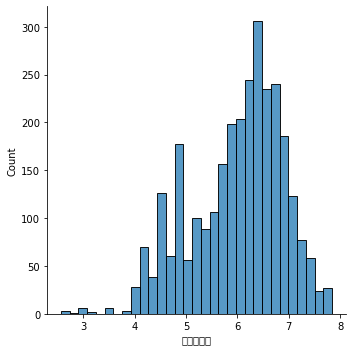

In [37]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,8))
sns.displot((np.log(train["등록차량수"])))

In [2]:
result_df = pd.DataFrame({"단지코드":test["단지코드"],"result":np.exp(result)})
a = result_df.groupby("단지코드")["result"].mean().reset_index().rename(columns={"단지코드":"code"})
a

NameError: name 'test' is not defined

In [20]:
sub = pd.read_csv("data/sample_submission.csv")
sub = pd.merge(sub, a , on = "code", how = "left")
sub = sub.drop(columns = "num")
sub.columns = ["code","num"]
sub

,code,num
0,C1072,3.661046
1,C1128,4.165024
2,C1456,3.461130
3,C1840,3.503392
4,C1332,4.128806
5,C1563,4.597204
6,C1794,3.907314
7,C1640,3.368567
8,C1377,3.049767
9,C2072,3.119391


In [1091]:
sub.to_csv("sub0715.csv",index=False)

In [1090]:
#(7월 15일 기준) 참가자수 : 1160명, 제출자수 : 408명, 등수 : 4등 점수 : 91.54013